In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [7]:
# 모델 불러오기
loaded_model = tf.keras.models.load_model('./mnist.h5')
loaded_model

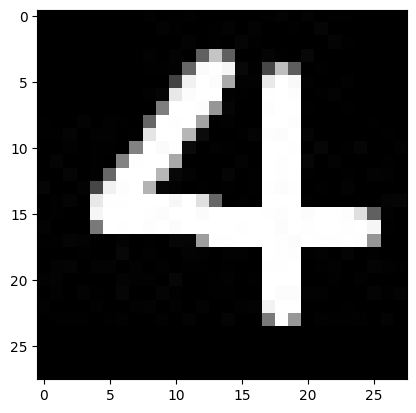

In [54]:
# 이미지 준비
img = Image.open('../../data/img/mni4.jpg').resize((28, 28)).convert('L')
img = np.array(img); img = (255 - img)/255.0;
plt.imshow(img, cmap = 'gray')

In [27]:
img.shape

(28, 28)

In [55]:
input_img = img.reshape(1, 28, 28)
input_img.shape

(1, 28, 28)

In [56]:
pred = loaded_model.predict(input_img)
pred

# 원핫 인코딩 하지 않고 입력한 데이터는 tf.nn.softmax()해야 값들의 합이 1이 됨
# 근데 안해도 어쨌든 argmax()하면 가장 큰 값(예측값)은 구할 수 있음
out = pred.argmax()
out

1/1 [==============================] - 0s 15ms/step


4

In [61]:
# 제대로 결과값 보려면 이렇게도 할 수 있음
output = tf.nn.softmax(pred)
class_ = np.array(output[0,:]).argmax()
output, class_

(<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[0.0853442 , 0.08534416, 0.08534448, 0.08534416, 0.23185201,
         0.08534416, 0.08534417, 0.08534422, 0.08534417, 0.08539432]],
       dtype=float32)>,
 4)

In [62]:
# 만약 레이블이 따로 있다면
class_num = ['숫자0', '숫자1', '숫자2', '숫자3', '숫자4', '숫자5', '숫자6', '숫자7', '숫자8', '숫자9']
class_num[class_]

'숫자4'